This is the HW1 of the subject.

PROBLEM 1

In [1231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rand
from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [1232]:
global orange 
global blue
global N

N = 100 # Number of initial points
sz = 10

orange = [] 
blue = []

w1 = 0.3
w2 = round(1.0 - w1, 2)
w3 = 0.8
w4 = round(1.0 - w3, 2)

classes = 2

w = [w1, w2, w3, w4]
pho = [1, 1, -3, 2]

def plot(x, y, col):
    global s
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.title("Gaussian distribution")
    plt.scatter(x, y, color = col, s = sz)
    plt.show()

def f(w, pho, str):
    f = []
    if str == 'orange':
        index = [0, 1]
    elif str == 'blue':
        index = [2, 3]        
    f.append(w[index[0]] * rand.gauss(pho[index[0]], 1))
    f.append(w[index[1]] * rand.gauss(pho[index[1]], 1))
    return f

variance_mat = np.identity(2)
j = 2


After having defined the main variables and functions, the main program will be coded.

In [1233]:
def main():
    global blue
    global orange
    orange = []
    blue = [] 
    for i in range(int(N/classes)):
        orange.append(f(w, pho, 'orange'))
        blue.append(f(w, pho, 'blue'))
    orange = pd.DataFrame(orange)
    blue = pd.DataFrame(blue)    

main()

Once having sampled the Gaussian distribution and having obtained the statistical data, we will perform some Data Exploration for making sure the created data samples are right.

In [1234]:
print("ORANGE CLASS DATAFAME EXPLORATION \n")
orange.describe()

ORANGE CLASS DATAFAME EXPLORATION 



,0,1
count,50.000000,50.000000
mean,0.314027,0.675722
std,0.282619,0.662557
min,-0.474457,-0.898920
25%,0.150843,0.249330
50%,0.336300,0.591407
75%,0.502068,1.027947
max,0.876617,2.414115


In [1235]:
print("BLUE CLASS DATAFAME EXPLORATION \n")
blue.describe()

BLUE CLASS DATAFAME EXPLORATION 



,0,1
count,50.000000,50.000000
mean,-2.396205,0.391980
std,0.867745,0.187405
min,-4.087913,-0.050897
25%,-3.073316,0.259952
50%,-2.301241,0.397061
75%,-1.782398,0.499311
max,-0.526039,0.849449


After the basic data exploration, we have verified that the mean of the sampled data is the same as we expected (0.3, 0.7, 0.8 * -3 = -2.4, 0.2 * 2).
Now, we will proceed to plot the data into a 2-D map. First of all, each class individually. Then, both of them in the same 2-D plot.

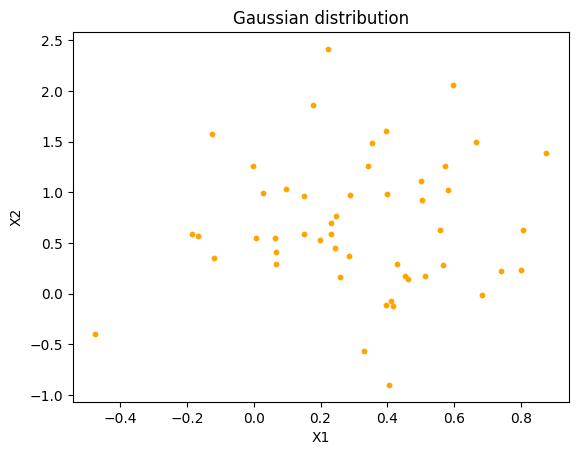

In [1236]:
plot(orange.loc[:, 0], orange.loc[:, 1], 'orange')

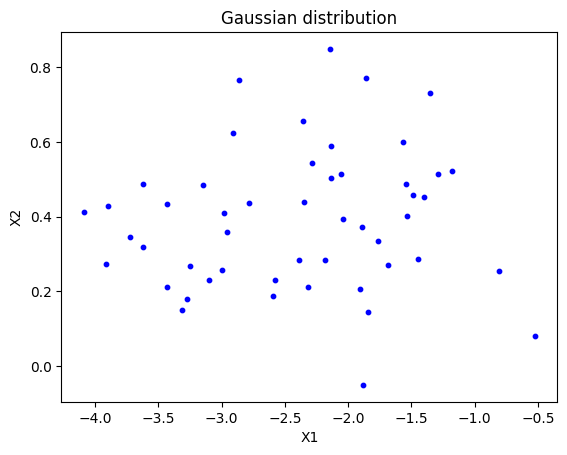

In [1237]:
plot(blue.loc[:, 0], blue.loc[:, 1], 'blue')

Now, we will plot both distributions at once.

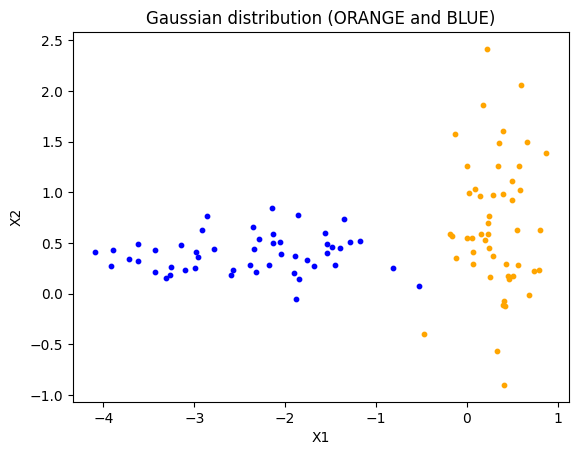

In [1238]:
def double_plot(orange, blue):
    global s
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.title("Gaussian distribution (ORANGE and BLUE)")
    plt.scatter(orange.loc[:, 0], orange.loc[:, 1], color = 'orange', s = sz)
    plt.scatter(blue.loc[:, 0], blue.loc[:, 1], color = 'blue', s = sz)
    plt.show()

    
double_plot(orange, blue)


Finally, we will step by step increase the number of points created in order to see how the distribution sampling changes, and gets more precise. 

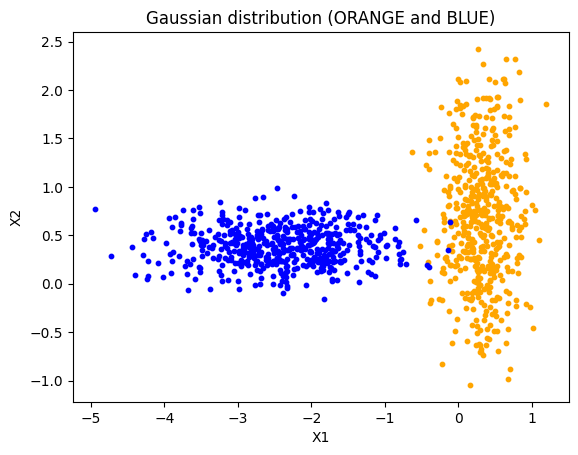

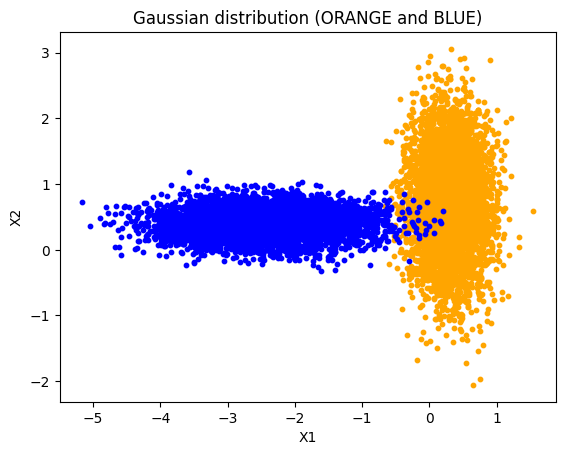

In [1239]:
for i in range(2):
    N = N * 10
    main()
    double_plot(orange, blue)

1) Naive Bayes decision boundary

In [1240]:
N = 2 * 1000

def plot_decision_boundaries(X, y, model_class, **model_params):
   
    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print("Coercing input data to NumPy arrays failed")
    # Reduces to the first two columns of data
    reduced_data = X[:, :2]
    # Instantiate the model object
    model = model_class(**model_params)
    # Fits the model with the reduced data
    model.fit(reduced_data, y)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].    

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    # Meshgrid creation
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predictions to obtain the classification results
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plotting
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel("X1",fontsize=15)
    plt.ylabel("X2",fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    return plt

We define a generative function for drawing a decision boundary. This function is compatible with all the scikit-learn classification models. Now, the Navie Bayes classification algorithm will be implemented.

1600
The accuracy of the model is:  0.995


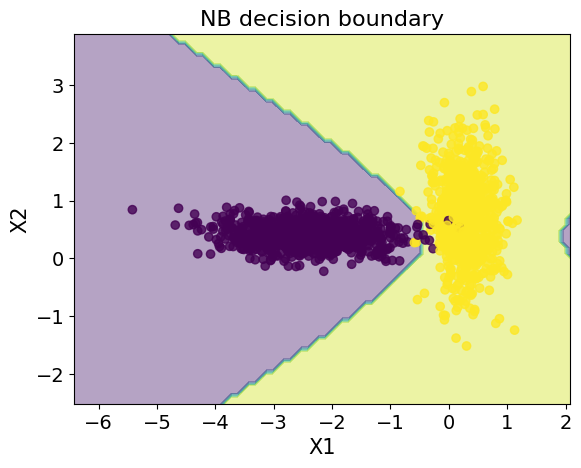

In [1241]:
main() #create the data from sampling distributions

# Initializing Classifier
clf5 = GaussianNB()

size_or = np.size(orange, 0)
size_bl = np.size(orange, 0)
orange['class'] = np.ones(size_or) #orange class = 1
blue['class'] = np.zeros(size_bl) #blue class = 0

df = pd.concat([orange, blue])
df.describe()
df = df.sample(np.size(df, 0))
df.head()

X = df.loc[:, [0, 1]]
y = df.loc[:, 'class']

test_sz = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_sz, random_state=20)
#keeping 80% as training data and 20% as testing data.
 
print(len(y_train))
#Calling the Class
naive_bayes = GaussianNB()
 
#Fitting the data to the classifier
naive_bayes.fit(X_train , y_train)

#Predict on test data
y_predicted = pd.DataFrame(naive_bayes.predict(X_test))
 
accuracy_1 = round(metrics.accuracy_score(y_predicted , y_test), 3)
print("The accuracy of the model is: ", accuracy_1)

plt.figure()
plt.title("NB decision boundary", fontsize = 16)
plot_decision_boundaries(X_train, y_train, GaussianNB)
plt.show()



2) a) K-NN. k = 15

In [1242]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

main() #create the data from sampling distributions

global k
k = 15

main()

test_sz = 0.2

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_sz, random_state=42)

We perform some data exploration.

In [1243]:
print(df.head())
print(X.head())
print(y.head())

            0         1  class
121 -0.093575  0.204564    1.0
545 -3.076223  0.503197    0.0
529 -2.653823  0.360616    0.0
807 -2.845136  0.680476    0.0
746 -2.781698  0.435430    0.0
            0         1
121 -0.093575  0.204564
545 -3.076223  0.503197
529 -2.653823  0.360616
807 -2.845136  0.680476
746 -2.781698  0.435430
121    1.0
545    0.0
529    0.0
807    0.0
746    0.0
Name: class, dtype: float64


Now, we create the K-NN with k=15 model.

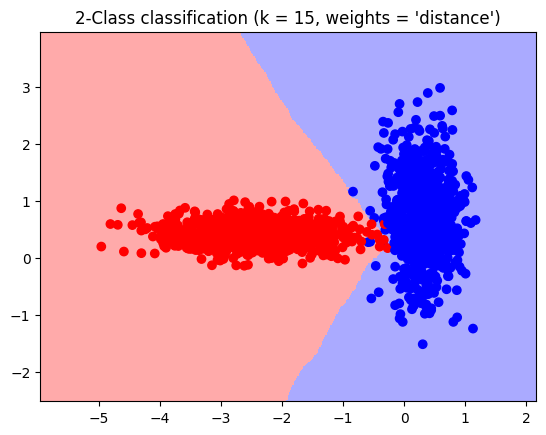

In [1244]:
knn = KNeighborsClassifier(n_neighbors = k)

n_neighbors = k

X = X_train
y = y_train

margin = 0.25
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X.loc[:, 0].min() - 1, X.loc[:, 0].max() + 1
    y_min, y_max = X.loc[:, 1].min() - 1, X.loc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    #plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X.loc[:, 0], X.loc[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights))

Now, we use the testing data for performing the predictions and calculating the accuracy of the model. 

The accuracy of the model is:  1.0


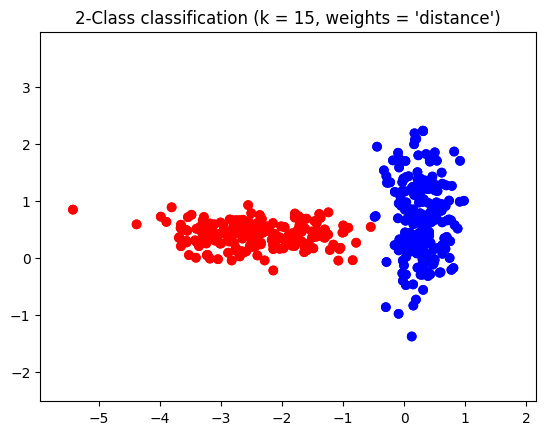

In [1245]:
X = X_test

y = clf.predict(X)
res_a = y
for i in range(2):
# Plot the testing points
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.scatter(X.loc[:, 0], X.loc[:, 1], c=y, cmap=cmap_bold)
    plt.title("2-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights))
    y = y_test
    
accu = 0
length = len(res_a)
y_test = y_test.ravel()
for i in range(length):
    if res_a[i] == y_test[i]:
        accu += 1
accuracy_2a = round(accu / length, 3)

print("The accuracy of the model is: ", accuracy_2a)


2) b) Using a linear model

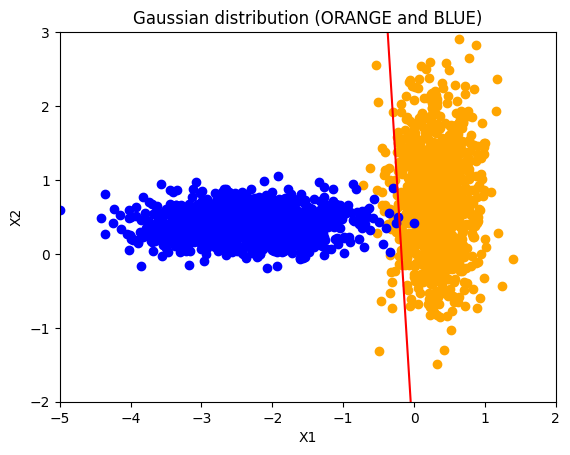

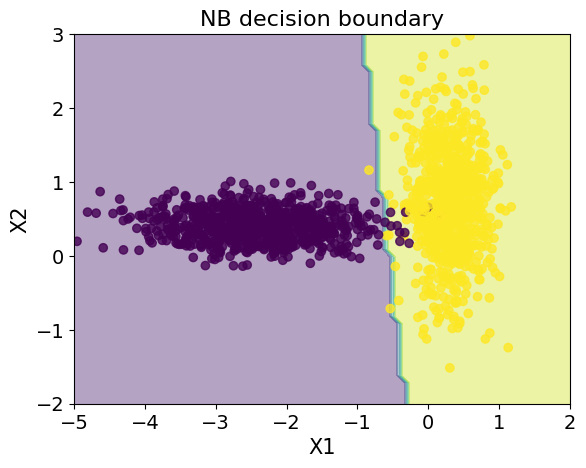

In [1246]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

main() #create the data from sampling distributions

model = linear_model.LinearRegression()
iter = 100.0
coeff = 8

model.fit(X, y)
weights = np.round(model.coef_, 2)
weights[0] += 2.0
weights[1] += 0.1
predictions = model.predict(X)
predictions = pd.DataFrame(predictions)
boundary = predictions.median()

X_min = X.loc[:, 0].min()
X_max = X.loc[:, 0].max()
boundary_y = []
boundary_x = np.arange(X_min - 0.5, X_max + 0.5, (X_max + 0.5 - X_min - 0.5) / iter)

for i in range(len(boundary_x)):
    boundary_y.append(boundary / weights[1] - weights[0] / weights[1] * boundary_x[i] - coeff)

plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Gaussian distribution (ORANGE and BLUE)")
plt.scatter(orange.loc[:, 0], orange.loc[:, 1], color = 'orange')
plt.scatter(blue.loc[:, 0], blue.loc[:, 1], color = 'blue')
plt.plot(boundary_x, boundary_y, 'red')
plt.xlim(-5, 2)
plt.ylim(-2, 3)
plt.show()

plt.figure()
plt.title("NB decision boundary", fontsize = 16)
plt.xlim(-5, 2)
plt.ylim(-2, 3)
plot_decision_boundaries(X_train, y_train, LogisticRegression)
plt.show()

Now, we compute the testing in order to get the accuracy.

The accuracy of the model is:  0.978


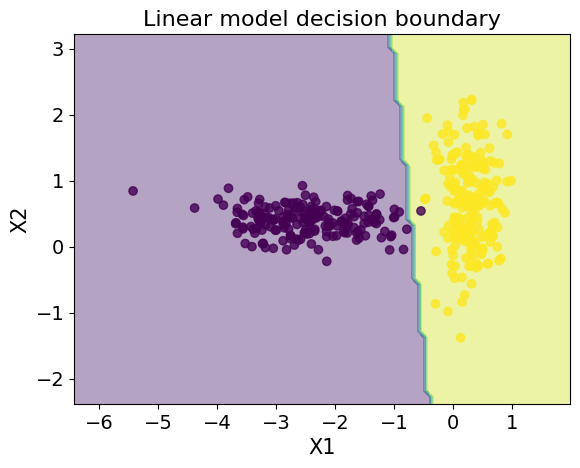

In [1247]:
#Predict on test data
y_predicted = model.predict(X_test)
for x in range(len(y_predicted)): y_predicted[x] = round(abs(y_predicted[x]), 0)

accuracy_2b = round(metrics.accuracy_score(y_predicted , y_test), 3)
print("The accuracy of the model is: ", accuracy_2b)

plt.figure()
plt.title("Linear model decision boundary", fontsize = 16)
plot_decision_boundaries(X_test, y_test, LogisticRegression)
plt.show()


3) Counting misclassifications

In [1248]:
print("ACCURACY RESULTS\n")
print("Accuracy 1: ", accuracy_1)
print("Accuracy 2a: ", accuracy_2a)
print("Accuracy 2b: ", accuracy_2b)
print("\n")

tot = np.shape(y_train)[0] + np.shape(y_test)[0]

print("MISCLASSIFICATION RESULTS\n")
print("Misclassification 1: ", int((1 - accuracy_1) * tot))
print("Misclassification 2a: ", int((1 - accuracy_2a) * tot))
print("Misclassification 2b: ", int((1 - accuracy_2b) * tot))

print("\nTotal number of cases: ", tot)


ACCURACY RESULTS

Accuracy 1:  0.995
Accuracy 2a:  1.0
Accuracy 2b:  0.978


MISCLASSIFICATION RESULTS

Misclassification 1:  10
Misclassification 2a:  0
Misclassification 2b:  44

Total number of cases:  2000


PROBLEM 3.

In [1249]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris


N = 2 * 100

main() #create the data from sampling distributions

k = 1

# for i in range(N):
#     k += 1
#     main()
#     double_plot(orange, blue)
    

# Create feature and target arrays
X = df.drop('class', axis = 1)

y = df.loc[:, 'class']

test_sz = 0.2

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_sz, random_state=42)

knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)

# Predict on dataset which model has not seen before
knn.predict(X_test)

# Calculate the accuracy of the model
print(knn.score(X_test, y_test))



1.0


K = [0:200]

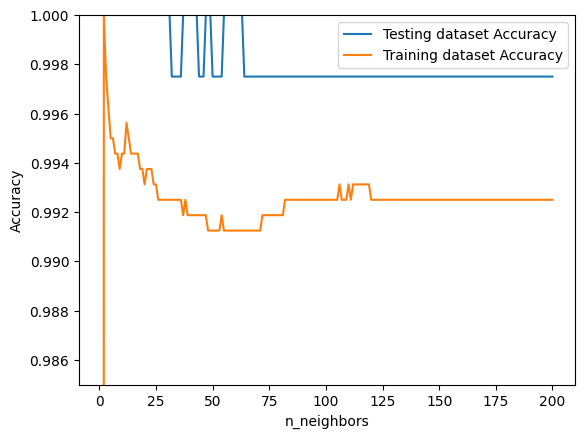

In [1251]:
neighbors = np.array(range(1, N))
train_accuracy = np.empty(len(neighbors) + 1)
test_accuracy = np.empty(len(neighbors) + 1)
  
# Loop K times
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    # Compute training and test data accuracy
    train_accuracy[k] = knn.score(X_train, y_train)
    test_accuracy[k] = knn.score(X_test, y_test)
  
# Generate plot
length = len(test_accuracy)
plt.plot(range(length) + np.ones(length), test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(range(length) + np.ones(length), train_accuracy, label = 'Training dataset Accuracy')
plt.ylim(0.985, 1.00)
#plt.xlim(0, 10)
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

The testing error maintains quite constant its value, no matter the k number of Nearest Neighbors.

The training error decreases the greater it gets the k number of Nearest Neighbors. As we have seen in class, the greater is the k number, the simpler is the model, therefore, the worse fits the training data, that is why the training error value falls. Nevertheless, for small k number of Nearest Neighbors' values, the model is quite complex and perfectly adapts to the training data. But, this usually brigs about loss of generalization, therefore ending up in overfitting due to the high complexity of the model. 